ЛАБОРАТОРНАЯ РАБОТА ПО ОБРАБОТКЕ ИЗОБРАЖЕНИЙ #4
 
=====  ЧАСТЬ 3  =====
Применить алгоритм сегментации watershed+distance transform
для задачи подсчета пальмовых деревьев.
--------------------------------------------------------------------------------

РЕЗУЛЬТАТ: Количество найденных деревьев: 100


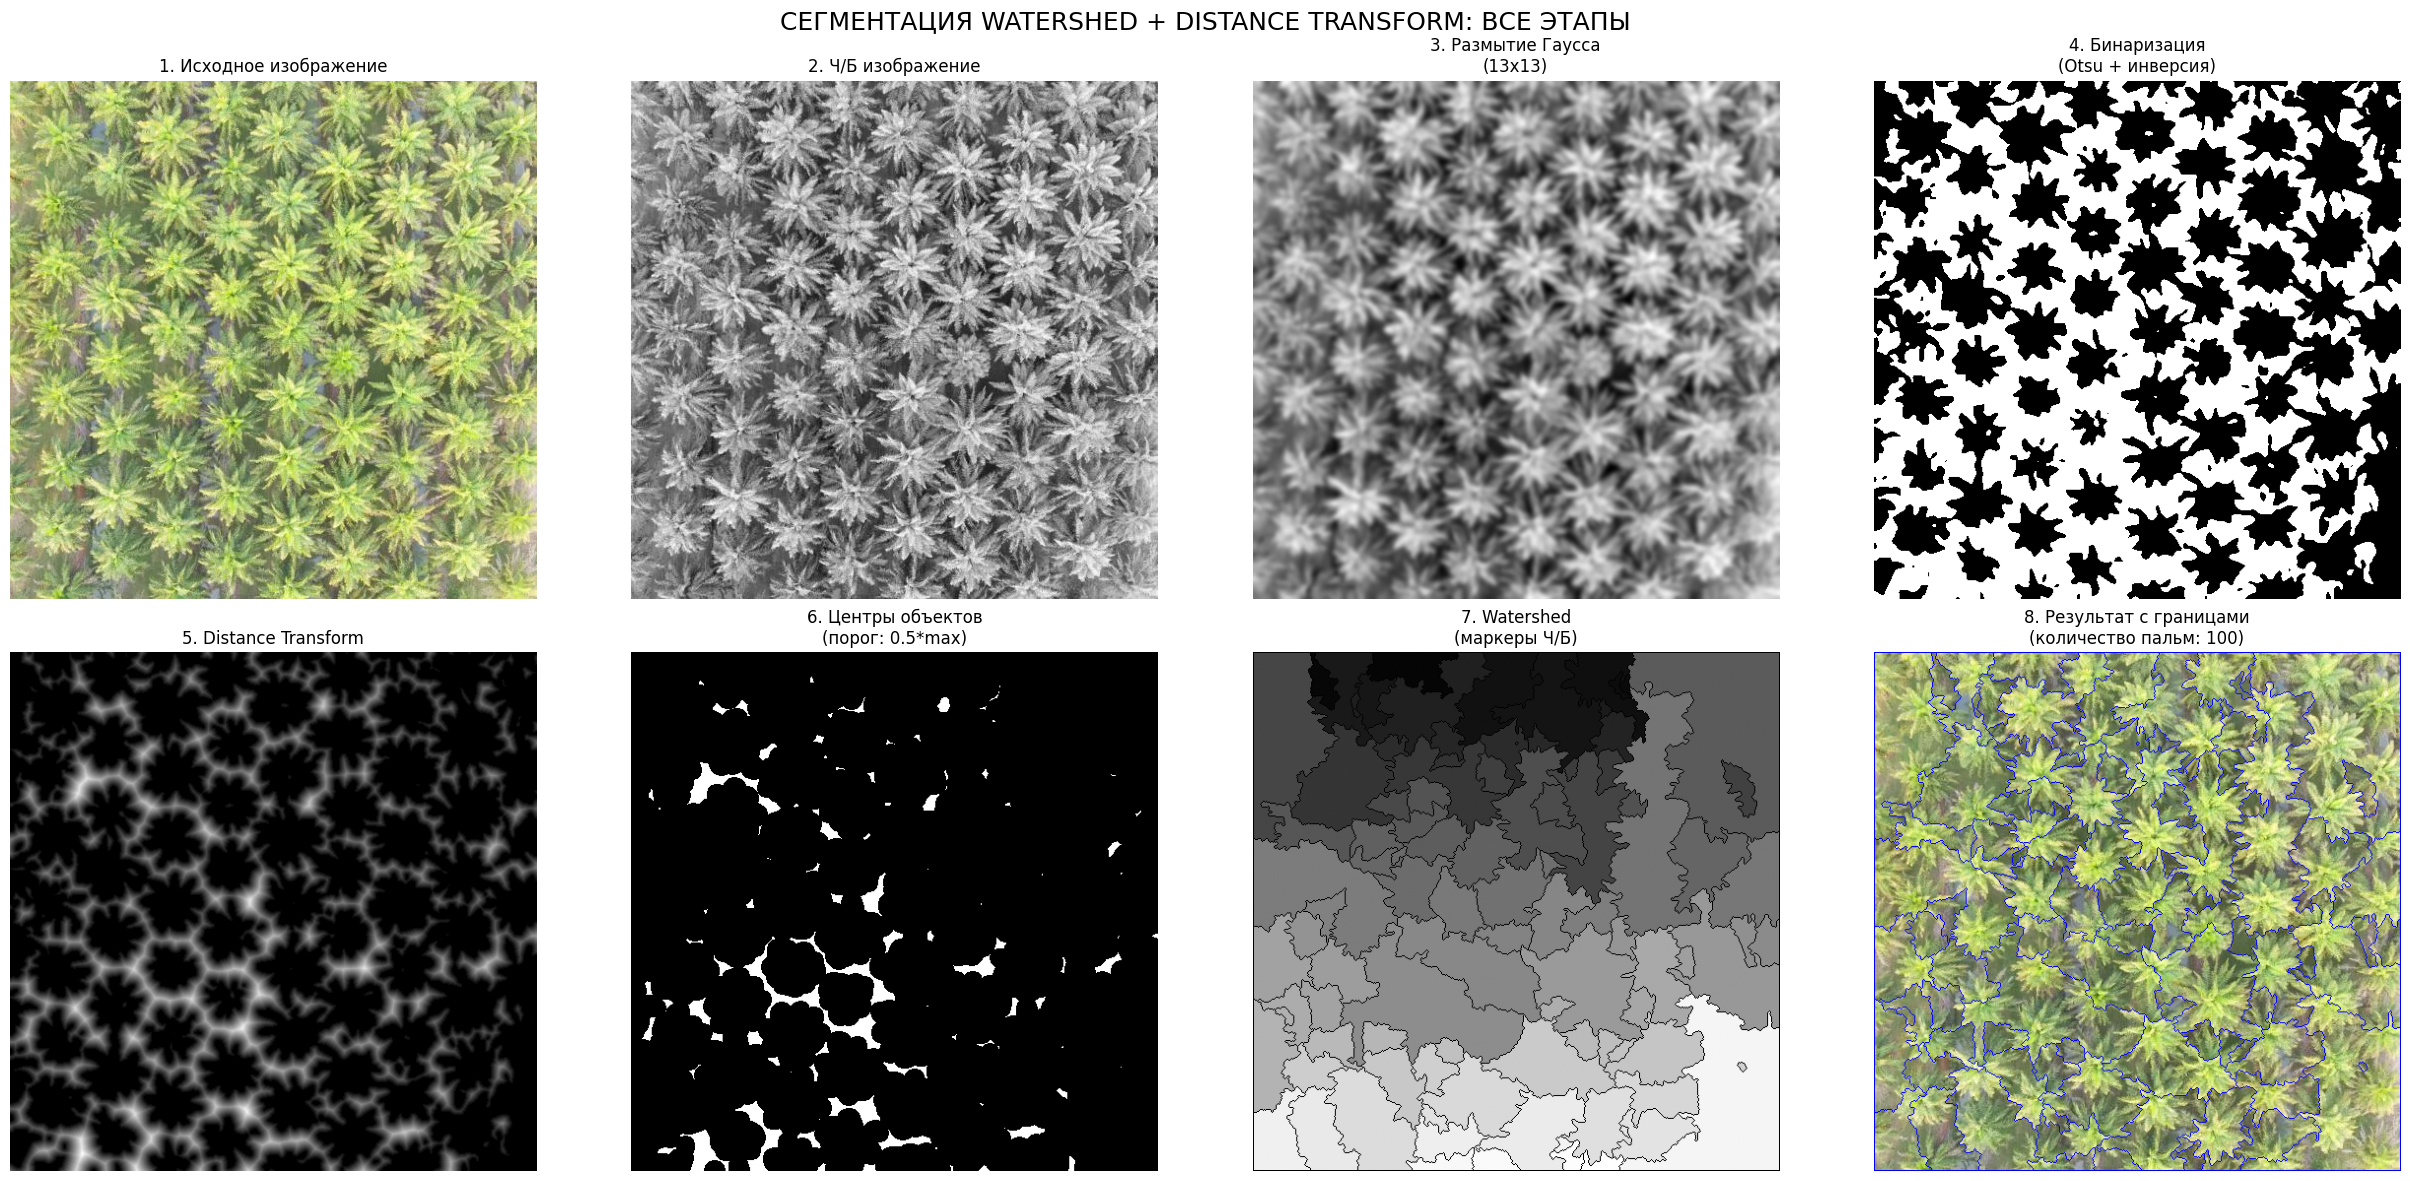

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

print("="*50)
print("ЛАБОРАТОРНАЯ РАБОТА ПО ОБРАБОТКЕ ИЗОБРАЖЕНИЙ #4")
print("="*50)
print(" ")

###3 ЗАДАНИЕ : Применить алгоритм сегментации watershed+distance transform для задачи подсчета пальмовых деревьев.
print("="*5, " ЧАСТЬ 3 ", "="*5)
print("Применить алгоритм сегментации watershed+distance transform")
print("для задачи подсчета пальмовых деревьев.")
print("-"*80)

# Загружаем изображение
image_palms = cv2.imread("palm_1.JPG")
if image_palms is None:
    raise FileNotFoundError("Файл palm_1.JPG не найден!")


# Преобразование в градации серого
image_palms_gray = cv2.cvtColor(image_palms, cv2.COLOR_BGR2GRAY)

# Размытие Гаусса
image_palms_blurred = cv2.GaussianBlur(image_palms_gray, (13, 13), 0)

# Пороговая бинаризация (Otsu + инверсия)
ret, thresh = cv2.threshold(image_palms_blurred, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Distance Transform
dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)

# Выделение точных объектов (центры деревьев)
ret, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, cv2.THRESH_BINARY)
sure_fg = sure_fg.astype(np.uint8)

# Алгоритм Watershed
markers_watershed = cv2.watershed(image_palms, markers)

num_palms = len(np.unique(markers_watershed)) - 1
print(f"\nРЕЗУЛЬТАТ: Количество найденных деревьев: {num_palms}")

# Визуализация итогового результата с границами
segmented_image = image_palms.copy()
segmented_image[markers_watershed == -1] = [255, 0, 0]

plt.figure(figsize=(25, 12))

plt.subplot(2, 4, 1)
plt.imshow(cv2.cvtColor(image_palms, cv2.COLOR_BGR2RGB))
plt.title("1. Исходное изображение")
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(image_palms_gray, cmap='gray')
plt.title("2. Ч/Б изображение")
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(image_palms_blurred, cmap='gray')
plt.title("3. Размытие Гаусса\n(13x13)")
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(thresh, cmap='gray')
plt.title("4. Бинаризация\n(Otsu + инверсия)")
plt.axis('off')

plt.subplot(2, 4, 5)
plt.imshow(dist_transform, cmap='gray')
plt.title("5. Distance Transform")
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(sure_fg, cmap='gray')
plt.title("6. Центры объектов\n(порог: 0.5*max)")
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(markers_watershed, cmap='gray')
plt.title("7. Watershed\n(маркеры Ч/Б)")
plt.axis('off')

plt.subplot(2, 4, 8)
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title(f'8. Результат с границами\n(количество пальм: {num_palms})')
plt.axis('off')

plt.suptitle("СЕГМЕНТАЦИЯ WATERSHED + DISTANCE TRANSFORM: ВСЕ ЭТАПЫ", fontsize=18)
plt.tight_layout()
plt.show()
